In [1]:
# using convolution network for arabic digits recognization
# we will train our network using only the csvtrainimages.csv file and evaluate our model accuracy based on csvtestimages.csv file

In [16]:
# dependencies
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import MaxPooling2D,Conv2D,Flatten,Activation,Dense,Dropout,BatchNormalization
from keras.optimizers import Adamax
from  matplotlib import pyplot as plt
from IPython.display import clear_output

In [17]:
# getting training ans testing images

X_train = pd.read_csv('csvTrainImages.csv', header= None)
y_train = pd.read_csv('csvTrainLabel.csv', header= None)

X_test = pd.read_csv('csvTestImages.csv', header= None)
y_test = pd.read_csv('csvTestLabel.csv', header= None)

In [18]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_train.head()

,0
0,1
1,1
2,1
3,1
4,1


In [20]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_test.head()

,0
0,1
1,1
2,2
3,2
4,3


In [22]:
print('Unique classes: {}'.format(y_train.nunique()))

Unique classes: 0    28
dtype: int64


In [23]:
# one hot encoding the labels for the training set and testing set
y_train = to_categorical(y_train,29)

y_test = to_categorical(y_test,29)

In [24]:
print(y_train[0])

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [25]:
print(y_test[0])

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [26]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(13440, 1024) (13440, 29) (3360, 1024) (3360, 29)


In [27]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
# reshape input images to 32*32*1
X_train = X_train.reshape([-1, 32, 32, 1])
X_test = X_test.reshape([-1, 32, 32, 1])

In [28]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(13440, 32, 32, 1) (13440, 29) (3360, 32, 32, 1) (3360, 29)


In [44]:
# Building convolutional model
model = Sequential()
model.add(Conv2D(32, (7,7),padding = 'same', input_shape=(32,32,1),strides = (1,1), init='he_normal'))
model.add(BatchNormalization(axis = 3))
model.add(Activation('relu'))
    
model.add(Conv2D(32, (7,7),strides = (1,1), init='he_normal'))
model.add(BatchNormalization(axis = 3))
model.add(Activation('relu'))    

# Flatten the 3D output to 1D tensor for a fully connected layer to accept the input
model.add(Flatten())
model.add(Dense(29, activation = 'sigmoid', init='he_normal')) #Last layer with one output per class

C:\Users\ADITYA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), input_shape=(32, 32, 1..., padding="same", strides=(1, 1), kernel_initializer="he_normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ADITYA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), strides=(1, 1), kernel_initializer="he_normal")`
  import sys
C:\Users\ADITYA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(29, activation="sigmoid", kernel_initializer="he_normal")`
  del sys.path[0]


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        1600      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 32)        50208     
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
__________

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#plot
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

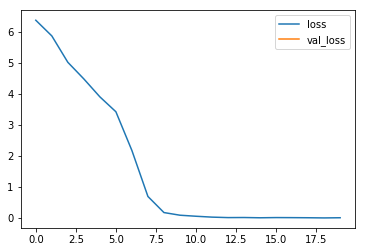

13440/13440 [==============================] - 241s 18ms/step - loss: 0.0125 - acc: 0.9969


In [49]:
model.fit(X_train, y_train,
          epochs = 20,
          batch_size = 100,
          callbacks = [plot_losses],
         verbose = 1)

In [50]:
# evaluating the training score
score = model.evaluate(X_train, y_train, batch_size=100)
print('training score: ', score)

13440/13440 [==============================] - 97s 7ms/step
training score:  [0.019214506675866903, 0.9947172664992866]


In [51]:
# evaluating the testing score
score = model.evaluate(X_test, y_test, batch_size=100)
print('testing score: ', score)

3360/3360 [==============================] - 24s 7ms/step
testing score:  [0.52764216185148272, 0.89166666851157239]


In [ ]:
# saving the model 
model.save('model.h5')
#try to load the model and feel free the makes changes and then evaluate the model